In [1]:
%matplotlib inline
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

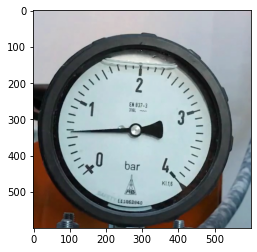

In [2]:
# D:\StudyTime\ProgrammingWorld\CodeZone\Development\AI_ML\Python\PressureGaugeReader\Images\out2\ExtractedImages
imgname = "../Python/PressureGaugeReader/Images/out2/ExtractedImages/ou0001.jpg"
# https://i.stack.imgur.com/5oOGL.jpg
# imgname = "stkdata/5oOGL.jpg"
img = cv2.imread(imgname)

# x = 20
# y = 60
# h = 720
# w = 525
# image = img[y:y+h, x:x+w]

plt.imshow(img)

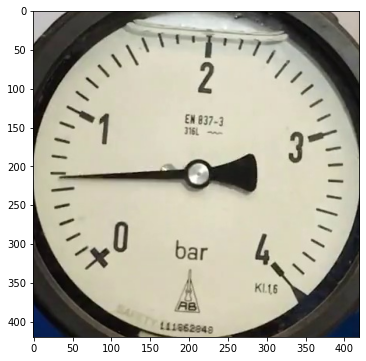

In [3]:
x = 70
y = 120

w = 420
h = 420

image = img[y:y+h, x:x+w]
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# cv2.imwrite("temp.jpg", image)

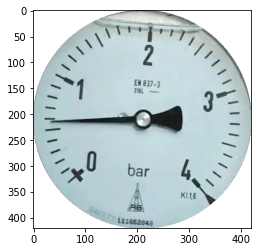

In [4]:
# # given x,y are circle center and r is radius
# x = 100
# y = 100
# r = 25

# rectX = (x - r) 
# rectY = (y - r)
# crop_img = image.img[y:(y+2*r), x:(x+2*r)]


newimg=image #Image.open("temp.jpg")
# plt.imshow(image)

height,width,channels = newimg.shape
# height = height -10
# width = width -10
lum_img = Image.new('L', [height,width] , 0)

draw = ImageDraw.Draw(lum_img)
draw.pieslice([(0,0), (height,width)], 0, 360,
			fill = 255, outline = "white")
img_arr =np.array(newimg)
lum_img_arr =np.array(lum_img)
# ax.imshow(cv2.cvtColor(Image.fromarray(lum_img_arr), cv2.COLOR_BGR2RGB))
# plt.imshow(lum_img_arr)
final_img_arr = np.dstack((img_arr,lum_img_arr))
# ax.imshow(cv2.cvtColor(Image.fromarray(final_img_arr), cv2.COLOR_BGR2RGB))
plt.imshow(final_img_arr)

# Save with alpha
Image.fromarray(final_img_arr).save('Image_Cropped.png')
# Below not working
# cv2.imwrite("temp.jpg", final_img_arr)


In [5]:
# # 1. Create a mask:

# height,width = image.shape
# mask = np.zeros((height,width), np.uint8)

# # 2. Draw the circles on that mask (set thickness to -1 to fill the circle):
# for i in circles[0,:]:
#     i[2]=i[2]+4
#     # Draw on mask
#     cv2.circle(mask,(i[0],i[1]),i[2],(255,255,255),thickness=-1)
# circle_img = cv2.circle(mask,(i[0],i[1]),i[2],(255,255,255),thickness=-1)

# # 3. Copy that image using that mask:

# masked_data = cv2.bitwise_and(image, image, mask=circle_img)

# # 4. Apply Threshold

# _,thresh = cv2.threshold(mask,1,255,cv2.THRESH_BINARY)

# # 5. Find Contour

# contours = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
# x,y,w,h = cv2.boundingRect(contours[0])

# # 6. Crop masked_data

# crop = masked_data[y:y+h,x:x+w]

In [6]:
# img1 = cv2.imread(imgname)
# img = cv2.imread(imgname,0)
# gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# ret, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)

# # Create mask
# height,width = img.shape
# mask = np.zeros((height,width), np.uint8)

# edges = cv2.Canny(thresh, 100, 200)
# #cv2.imshow('detected ',gray)
# cimg=cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
# circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 10000, param1 = 50, param2 = 30, minRadius = 0, maxRadius = 0)
# for i in circles[0,:]:
#     i[2]=i[2]+4
#     # Draw on mask
#     cv2.circle(mask,(i[0],i[1]),i[2],(255,255,255),thickness=-1)

# # Copy that image using that mask
# masked_data = cv2.bitwise_and(img1, img1, mask=mask)

# # Apply Threshold
# _,thresh = cv2.threshold(mask,1,255,cv2.THRESH_BINARY)

# # Find Contour
# contours = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
# x,y,w,h = cv2.boundingRect(contours[0])

# # Crop masked_data
# crop = masked_data[y:y+h,x:x+w]

# #Code to close Window
# cv2.imshow('detected Edge',img1)
# cv2.imshow('Cropped Eye',crop)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

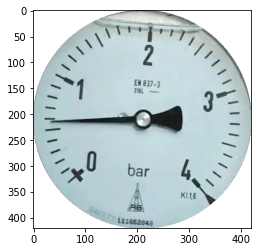

In [29]:
# imge = Image.open('Image_Cropped.png')
Image_Cropped = Image.fromarray(final_img_arr)
plt.imshow(Image_Cropped)

In [30]:
img_hsv = cv2.cvtColor(Image_Cropped,cv2.COLOR_BGR2HSV)  # Convert to HSV space
plt.imshow(img_hsv)

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [9]:
# # Lower hues mask (0-10)
# lower_red, upper_red = np.array([0,50,20]), np.array([10,255,255])
# mask0 = cv2.inRange(img_hsv, lower_red, upper_red)
# fig, ax = plt.subplots(figsize=(7, 7))
# ax.set_title("Thresholded Mask0", fontsize=16)
# ax.imshow(mask0, cmap="Greys")

# # Upper hues mask (170-180)
# lower_red, upper_red = np.array([170,50,0]), np.array([180,255,255])
# mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

# # Combine masks
# mask = mask0 + mask1
# fig, ax = plt.subplots(figsize=(7, 7))
# ax.set_title("Red Color Thresholded Mask", fontsize=16)
# ax.imshow(mask, cmap="Greys")

In [10]:
# channel_means = cv2.mean(img_hsv, mask=~mask)  # Invert mask to sample only the rectangle
# print(channel_means)
# print("Mean value (brightness) in red rectangle is %.2f" % (channel_means[2],))

In [11]:
# # RETR_EXTERNAL is the contour retrieval mode, CHAIN_APPROX_NONE is the contour approximation method
# # Output is a Python list of all the found contours, each one is a Numpy array of (x,y) coordinates
# (_,contours,_) = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [12]:
# # For each contour check object area with a bounding box, if area above threshold assume we found the rectangle
# imcopy = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).copy()
# for contour in contours:
#     (x,y,w,h) = cv2.boundingRect(contour)
    
#     # A threshold area of 1000 works for all the images in the data set (which can have different resolutions)
#     if w*h > 1000:
#         rect = cv2.minAreaRect(contour)  # Fit a rotated rectangle bounding box to the contour
#         print("Rotated rectangle found at center point" , np.round(rect[0]), "with angle", np.round(rect[2], 2), "degrees.")
#         print("Rotated rectangle width is %i and area is %i" % (np.round(min(rect[1][0], rect[1][1])), np.round(rect[1][0]*rect[1][1])))
#         rotrect_angle, rect_width, rect_area = rect[2], min(rect[1][0], rect[1][1]), rect[1][0]*rect[1][1]
#         print(rect[0])
#         # Draw the rotated rectangle (see https://stackoverflow.com/questions/11779100/python-opencv-box2d)
#         box = cv2.boxPoints(rect) # cv2.boxPoints(rect) for OpenCV 3.x
#         box = np.int0(box)
#         cv2.drawContours(imcopy,[box], 0, (0,255,0), 1)

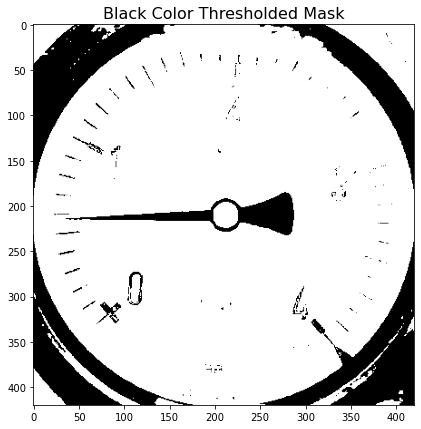

In [13]:
# Black HSV mask
lower_black, upper_black = np.array([0, 0, 0]), np.array([180, 255, 65])
mask = cv2.inRange(img_hsv, lower_black, upper_black)
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title("Black Color Thresholded Mask", fontsize=16)
ax.imshow(mask, cmap="Greys")

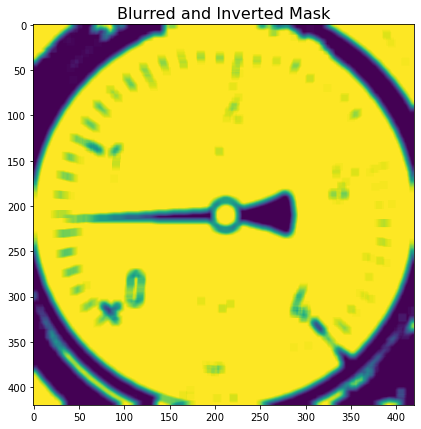

In [14]:
# Apply a Gaussian Blur to the inverted mask
blurred = cv2.blur(~mask, (9, 9))
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title("Blurred and Inverted Mask", fontsize=16)
ax.imshow(blurred)

In [15]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
 
# Adjust parameters for determining blob stability/repeatability
params.minThreshold = 0;
params.maxThreshold = 100;
params.minRepeatability = 1
 
# Filter by Area.
params.filterByArea = True
params.minArea = 0 # 0.75 * 118 * rect_area / 8079  # rect_area is found above during red rectangle detection
 
# Filter by Circularity
# params.filterByCircularity = True
# params.minCircularity = 0.5
 
# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

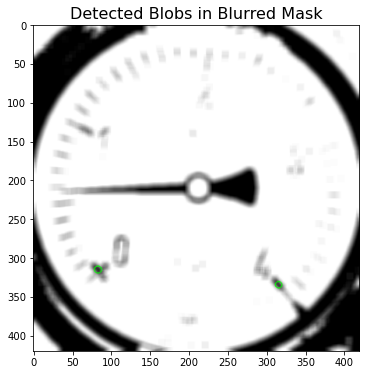

In [16]:
# Detect blobs
keypoints = detector.detect(blurred)

# Draw detected blobs as green circles on the blurred mask
imcopy = image.copy()
im_with_keypoints = cv2.drawKeypoints(blurred, keypoints, 
                                      np.array([]), (0,255,0), 
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)  # ensures circle size corresponds to blob size
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("Detected Blobs in Blurred Mask", fontsize=16)
ax.imshow(im_with_keypoints)

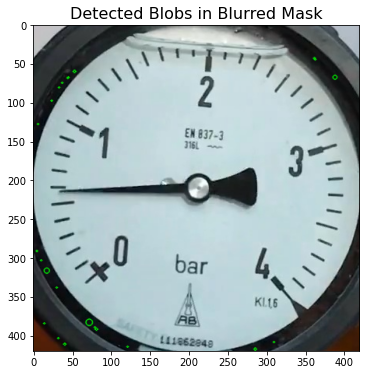

In [17]:
# image = cv2.imread(data_path + "sample1b.jpg")
# img_hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)  # Convert to HSV space

# Increment upper bound for "value" (brightness) until we find 6 blobs
n_blobs = 0
v_upper = 25
while n_blobs < 6 and v_upper < 100:
    
    # Black HSV mask
    lower_black, upper_black = np.array([0, 0, 0]), np.array([180, 255, v_upper])
    mask = cv2.inRange(img_hsv, lower_black, upper_black)
    
    # Apply a Gaussian Blur to the inverted mask
    blurred = cv2.blur(~mask, (9, 9))

    # Detect blobs
    keypoints = detector.detect(blurred)
    n_blobs = len(keypoints)
    v_upper += 5

# Draw detected blobs as green circles on the original image
imcopy = image.copy()
im_with_keypoints = cv2.drawKeypoints(imcopy, keypoints, 
                                      np.array([]), (0,255,0), 
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)  # ensures circle size corresponds to blob size
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("Detected Blobs in Blurred Mask", fontsize=16)
ax.imshow(im_with_keypoints)

In [18]:
# Extract coordinates of gauge centers in the (column index, row index) convention
gauge_center_coords = []
for kp in keypoints:
    gauge_center_coords.append((np.int(kp.pt[0]), np.int(kp.pt[1])))
    
# Sort the gauge's by center coordinates
gauge_center_coords.sort(key=lambda x: x[1])
gauge_center_coords[0:4] = sorted(gauge_center_coords[0:4], key=lambda x: x[0])
gauge_center_coords[4:] = sorted(gauge_center_coords[4:], key=lambda x: x[0])
print("Gauge centers found at coordinates: ", gauge_center_coords)

Gauge centers found at coordinates:  [(52, 60), (361, 43), (362, 45), (387, 67), (4, 291), (6, 128), (10, 303), (14, 384), (17, 316), (23, 98), (30, 338), (32, 403), (33, 81), (37, 75), (40, 410), (44, 68), (45, 68), (71, 382), (79, 389), (81, 391), (121, 414), (284, 417), (309, 408)]


C:\Users\Kunnu\AppData\Local\Temp/ipykernel_12744/2789644963.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  gauge_center_coords.append((np.int(kp.pt[0]), np.int(kp.pt[1])))


Locating Gauge Needles

In [19]:
# Pick out the first gauge to work on
circ_col, circ_row = gauge_center_coords[0]

# Extract rotated rectangle parameters
rotrect_angle, rect_width, rect_area = rect[2], min(rect[1][0], rect[1][1]), rect[1][0]*rect[1][1]
rect_col, rect_row = rect[0] 

# Determine good size for circles to be drawn around gauges
circ_rad = np.int(30 * rect_width / 57)

# Draw a circle centered around gauge center point, extract pixel indices and colors on circle perimeter
blank = np.zeros(image.shape[:2], dtype=np.uint8)
cv2.circle(blank, (circ_col, circ_row), circ_rad, 255, thickness=1)  # Draw function wants center point in (col, row) order like coordinates
ind_row, ind_col = np.nonzero(blank)
b = image[:, :, 0][ind_row, ind_col]
g = image[:, :, 1][ind_row, ind_col]
r = image[:, :, 2][ind_row, ind_col]
colors = list(zip(b, g, r))

# "reverse" the row indices to get a right-handed frame of reference with origin in bottom left of image
ind_row_rev = [image.shape[0] - row for row in ind_row]
circ_row_rev = image.shape[0] - circ_row
rect_row_rev = image.shape[0] - rect_row

# Convert from indexes in (row, col) order to coordinates in (col, row) order
circ_x, circ_y = circ_col, circ_row_rev
original_coord = list(zip(ind_col, ind_row_rev))
rect_x, rect_y = rect_col, rect_row_rev

# Rotate coords about rectangle center in order to identify topmost pixel of gauges
temp_x, temp_y = [x - rect_x for x in ind_col], [y - rect_y for y in ind_row_rev]  # Translate from rectangle center point
angle_deg = get_real_angle(rotrect_angle)
theta = angle_deg * (np.pi/180)
rotated = []
for (x, y) in list(zip(temp_x, temp_y)):
    rotated.append(((x*np.cos(theta) - y*np.sin(theta)) + rect_x, 
                    (y*np.cos(theta) + x*np.sin(theta)) + rect_y))  # Rotate about 0,0 then reverse translation from rectangle center point
top_yval = max([y for (x,y) in rotated])
top_pixel = [(x, y) for (x, y) in rotated if y == top_yval][0]

# Translate coords from gauge centers in order to compute angle between points on the perimeter
translated = []
for (x, y) in original_coord:
    translated.append((x - circ_x, y - circ_y))

# Construct dataframe holding various coordinate representations and pixel values
df = pd.DataFrame({"indices":list(zip(ind_col, ind_row)), "orig":original_coord, "rot": rotated, "trans": translated, "color": colors})

# Identify the pixel which is the topmost point of the circle when properly rotated
df["top_pixel"] = (df["rot"] == top_pixel)
top_trans_pix = df.loc[df["top_pixel"], "trans"].values[0]
df.head()

# Visualize the circle and topmost circle pixel
imcopy = image.copy()
fig, ax = plt.subplots(figsize=(18, 6))
ax.set_title("Sample Perimeter Circle and Topmost Pixel", fontsize=16)
cv2.circle(imcopy, (circ_col, circ_row), circ_rad, 255, thickness=1)  # Draw circle around gauge center point
top_orig_pix =  df.loc[df["top_pixel"], "indices"].values[0]  # Get indices for "topmost" pixel on circle after rotation
cv2.circle(imcopy, top_orig_pix, 1, 255, thickness=3)  # Draw topmost pixel
ax.imshow(imcopy)

NameError: name 'rect' is not defined

In [ ]:
import tkinter
from tkinter import *
import tkinter as tk
import tkinter.messagebox as mbox
from tkinter import filedialog
from PIL import Image, ImageTk, ImageDraw
import numpy as np
import cv2

In [ ]:
# Main Window
frame = Tk()
frame.title('Circular Image Cropper')
frame.geometry('1300x750')
# frame.configure(bg = "white")

# image on the main window
path = "image2.jpg"
# Creates a Tkinter-compatible photo image, which can be used everywhere Tkinter expects an image object.
img1 = ImageTk.PhotoImage(Image.open(path))
# The Label widget is a standard Tkinter widget used to display a text or image on the screen.
panel = tk.Label(frame, image = img1)
panel.place(x = 270, y = 150)

# starting label
start1 = Label(frame, text='CIRCULAR IMAGE CROPPER', font=("Arial", 55,"underline"),fg="magenta")
start1.place(x=120,y=10)

def start_fun():
    frame.destroy()

# creating an exit button
prevB = Button(frame, text='START', command=start_fun, font=("Arial", 25), bg = "light green", fg = "blue", borderwidth=3, relief="raised")
prevB.place(x = 200, y = 620)

# defined exit_win function, to show a exit dialog box when tried to exit
def exit_win():
    if mbox.askokcancel("Exit", "Do you want to exit?"):
        frame.destroy()

# creating an exit button
prevB = Button(frame, text='EXIT', command=exit_win, font=("Arial", 25), bg = "red", fg = "blue", borderwidth=3, relief="raised")
prevB.place(x = 970, y = 620)

# this is done to show the exit dialog box when tried to exit from the main window, using the top-roght close button of titlebar
frame.protocol("WM_DELETE_WINDOW", exit_win)
frame.mainloop()

#created main window
window = Tk()
window.geometry("1300x750")
window.title("Circular Image Cropper")

# defined variable
global count, emig
# global bright, con
# global frp, tname  # list of paths
frp = []
tname = []
con = 1
bright = 0
panelB = None
panelA = None



In [ ]:
# function defined to get the path of the image selected
def getpath(path):
    a = path.split(r'/')
    # print(a)
    fname = a[-1]
    l = len(fname)
    location = path[:-l]
    return location

# function defined to get the folder name from which image is selected
def getfoldername(path):
    a = path.split(r'/')
    # print(a)
    name = a[-1]
    return name

# function defined to get the file name of image is selected
def getfilename(path):
    a = path.split(r'/')
    fname = a[-1]
    a = fname.split('.')
    a = a[0]
    return a

# function defined to open the image file
def openfilename():
    filename = filedialog.askopenfilename(title='"pen')
    return filename

# function defined to open the selected image
def open_img():
    global x, panelA, panelB
    global count, eimg, location, filename
    count = 0
    x = openfilename()
    img = Image.open(x)
    eimg = img
    img = ImageTk.PhotoImage(img)
    temp = x
    location = getpath(temp)
    filename = getfilename(temp)
    # print(x)
    if panelA is None or panelB is None:
        panelA = Label(image=img)
        panelA.image = img
        panelA.pack(side="left", padx=50, pady=12)
        panelB = Label(image=img)
        panelB.image = img
        panelB.pack(side="right", padx=50, pady=12)
    else:
        panelA.configure(image=img)
        panelB.configure(image=img)
        panelA.image = img
        panelB.image = img

# function defined for cropping image in circle
def crop_fun():
    global  x
    # Open the input image as numpy array, convert to RGB
    img = Image.open(x).convert("RGB")
    npImage = np.array(img)
    h, w = img.size

    # Create same size alpha layer with circle
    alpha = Image.new('L', img.size, 0)
    draw = ImageDraw.Draw(alpha)
    draw.pieslice([0, 0, h, w], 0, 360, fill=255)

    # Convert alpha Image to numpy array
    npAlpha = np.array(alpha)

    # Add alpha layer to RGB
    npImage = np.dstack((npImage, npAlpha))

    # Save with alpha
    Image.fromarray(npImage).save('Cropped_Image.png')

    imge = Image.open('Cropped_Image.png')
    imge = ImageTk.PhotoImage(imge)
    panelB.configure(image=imge)
    panelB.image = imge
    mbox.showinfo("Cropping Status", "Image Cropped in Circle successfully.")

# function defined to reset the edited image to original one
def reset():
    global  x
    # print(x)
    image = cv2.imread(x)[:, :, ::-1]
    global count, eimg
    count = 6
    global o6
    o6 = image
    image = Image.fromarray(o6)
    eimg = image
    image = ImageTk.PhotoImage(image)
    panelB.configure(image=image)
    panelB.image = image
    mbox.showinfo("Success", "Image reset to original format!")

# function defined to same the edited image
def save_img():
    global location, filename, eimg
    print(filename)
    # eimg.save(location + filename + r"_edit.png")
    filename = filedialog.asksaveasfile(mode='w', defaultextension=".jpg")
    if not filename:
        return
    eimg.save(filename)
    mbox.showinfo("Success", "Cropped Image Saved Successfully!")



In [ ]:
# top label
start1 = tk.Label(text = "CIRCULAR IMAGE\nCROPPER", font=("Arial", 50, "underline"), fg="magenta") # same way bg
start1.place(x = 350, y = 10)

# original image label
start1 = tk.Label(text = "Original\nImage", font=("Arial", 40), fg="magenta") # same way bg
start1.place(x = 100, y = 300)

# edited image label
start1 = tk.Label(text = "Circular Cropped\nImage", font=("Arial", 40), fg="magenta") # same way bg
start1.place(x = 800, y = 300)

# save button created
saveb = Button(window, text="SAVE",command=save_img,font=("Arial", 25), bg = "orange", fg = "blue", borderwidth=3, relief="raised")
saveb.place(x =80 , y =20 )

# choose button created
chooseb = Button(window, text="SELECT",command=open_img,font=("Arial", 25), bg = "light green", fg = "blue", borderwidth=3, relief="raised")
chooseb.place(x =170 , y =650 )

# crop button created
enb = Button(window, text="CIRCULAR CROP",command=crop_fun,font=("Arial", 25), bg = "orange", fg = "blue", borderwidth=3, relief="raised")
enb.place(x =530 , y =650 )

# reset button created
resetb = Button(window, text="RESET",command=reset,font=("Arial", 25), bg = "yellow", fg = "blue", borderwidth=3, relief="raised")
resetb.place(x =1000 , y =650 )

# function created for exiting
def exit_win():
    if mbox.askokcancel("Exit", "Do you want to exit?"):
        window.destroy()

# exit button created
exitb = Button(window, text="EXIT",command=exit_win,font=("Arial", 25), bg = "red", fg = "blue", borderwidth=3, relief="raised")
exitb.place(x =1100 , y =20 )


window.protocol("WM_DELETE_WINDOW", exit_win)
window.mainloop()